In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Song lyrics analysis.

In [37]:
import sys
file_name = sys.argv[1]


['/home/micolash/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9008', '--control=9006', '--hb=9005', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"d162f257-c5a6-414c-b029-b939c7f12293"', '--shell=9007', '--transport="tcp"', '--iopub=9009', '--f=/home/micolash/.local/share/jupyter/runtime/kernel-v2-199jAFM4EH3dBft.json']


In [15]:

#lines=[]
# # with open('../data/'+file_name) as f:
#     words = f.read().replace(",","").replace(")","").replace("(","").split(" ")
# words = list(map( lambda x : x.split("\n"),words))
# words = [item for word in words for item in word]

['Roberto',
 'Roberto',
 'Roberto',
 'No',
 'aconsejes',
 'a',
 'nadie',
 'que',
 'no',
 'te',
 'lo',
 'haya',
 'pedido',
 'Ni',
 'acorrales',
 'a',
 'un',
 'cobarde',
 'ni',
 'a',
 'un',
 'león',
 'herido',
 'No',
 'creas',
 'que',
 'lo',
 'evidente',
 'siempre',
 'es',
 'la',
 'verdad',
 'No',
 'dinamites',
 'un',
 'puente',
 'que',
 'un',
 'día',
 'debas',
 'cruzar',
 'Si',
 'todo',
 'va',
 'muy',
 'bien',
 'seguro',
 'va',
 'a',
 'pasar',
 'algo',
 'malo',
 'Y',
 'a',
 'veces',
 'no',
 'se',
 'rompe',
 'el',
 'hilo',
 'por',
 'lo',
 'más',
 'delgado',
 'Nunca',
 'abras',
 'el',
 'paraguas',
 'antes',
 'que',
 'empiece',
 'a',
 'llover',
 'Ni',
 'regales',
 'un',
 'libro',
 'a',
 'quién',
 'no',
 'sabe',
 'leer',
 'No',
 'deseés',
 'que',
 'mueran',
 'tus',
 'enemigos',
 'Es',
 'mejor',
 'que',
 'estén',
 'vivos',
 'para',
 'verte',
 'triunfar',
 'La',
 'conciencia',
 'vale',
 'más',
 'que',
 'mil',
 'testigos',
 'Nunca',
 'lastimes',
 'a',
 'quién',
 'después',
 'no',
 'puedas',
 '

In [35]:
#Build the stopwords list
stop = []
with open('stop.txt') as f:
    stop = f.read().split("\n")

['a', 'en', 'las', 'el', 'de', 'lo', 'un', 'te', 'la', 'que', 'es']

In [32]:
#Eliminar los articulos de la lista
stop_words = ["a","en","las","el","de","lo", "un","te","la","que","es"]
words_clean = [word for word in words if word not in stop_words]
words_clean
text = " ".join(words_clean)

In [33]:
words_unique,counts =np.unique(words_clean, return_counts=True)
df = pd.DataFrame({"word":words_unique,"count":counts})
df.sort_values(by = ["count"], ascending = False)

,word,count
11,Roberto,19
8,No,12
114,no,10
69,estar,6
174,voces,6
...,...,...
74,estén,1
75,evidente,1
76,experto,1
77,festejes,1


(-0.5, 399.5, 199.5, -0.5)

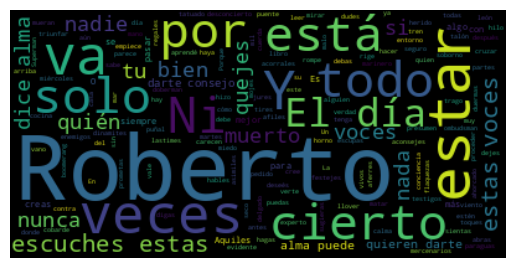

In [34]:
#text = open( '../l1.txt').read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [2]:
import lyricsgenius as lg # https://github.com/johnwmillr/LyricsGenius


file = open("lyrics_1.txt", "w")  # File to write lyrics to
genius = lg.Genius('4XlLAe5wuw8CZQsIrMpf5HjMu2su7SKwKDK-FLLSE6Qvdlx2NYpQoUwFHhnM_Fyr',  # Client access token from Genius Client API page
                             skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"],
                             remove_section_headers=True)

artists = ['Mac Miller']


def get_lyrics(arr, k):  # Write lyrics of k songs by each artist in arr
    c = 0  # Counter
    for name in arr:
        try:
            songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
            s = [song.lyrics for song in songs]
            file.write("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
            c += 1
            print(f"Songs grabbed:{len(s)}")
        except:  #  Broad catch which will give us the name of artist and song that threw the exception
            print(f"some exception at {name}: {c}")


get_lyrics(artists, 3)

Searching for songs by Mac Miller...

Song 1: "Self Care"
Song 2: "Good News"
Song 3: "2009"

Reached user-specified song limit (3).
Done. Found 3 songs.
Songs grabbed:3
